In [2]:
import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go

cf.go_offline(connected= True)

In [6]:
df1 = pd.read_csv('merged.csv',encoding ='cp949',index_col = 0)

In [8]:
df1.columns

Index(['index', 'big_category', 'small_category', 'ranking', 'name', 'price',
       'sale_price', 'sale_ratio', 'delivery', 'morph',
       ...
       '콘도', '리본', '공공기관', '춘천', '펜', '하디', '주년', '프로젝터', '방수', '가야'],
      dtype='object', length=4321)

In [13]:
df2 = df1.loc[:, ~df1.columns.isin(['index', 'big_category', 'small_category', 'ranking', 'name', 'price',
       'sale_price', 'sale_ratio', 'delivery', 'morph','nouns'])].copy()

In [14]:
df2.head()

,잔꽃,용품,렛,아유,날,라코스테,장군,토너,디파이,얼마나,...,콘도,리본,공공기관,춘천,펜,하디,주년,프로젝터,방수,가야
Column2,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.decomposition import TruncatedSVD

import sklearn
tsvd  = sklearn.decomposition.TruncatedSVD(n_components=2,algorithm='randomized', n_iter=5,  random_state=None, tol=0.0)

tsvd.fit(df2)

TruncatedSVD()

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_ftrs = iris.data

In [33]:
array = np.array(df2)

In [38]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline


# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=3)
tsvd.fit(array)
array_tsvd = tsvd.transform(array)

In [41]:
df_new = pd.DataFrame(array_tsvd,columns = ['w1','w2','w3'])

In [59]:
color_index = df1.groupby('big_category').count()['index'].index
color = np.linspace(0, len(color_index))

In [64]:
df1_index = df1.groupby('big_category').count()[['index']].reset_index()

In [72]:
df_color_merge = pd.concat([df1_index, pd.DataFrame(color,columns = ['color'])],axis=1)

In [77]:
df_color = df_color_merge.iloc[0:12,:]

In [86]:
df_new_concat= pd.concat([df1['big_category'],df_new],axis=1)

In [89]:
df_color = df_color[['big_category','color']]

In [90]:
df_color

,big_category,color
0,e쿠폰/티켓,0.000000
1,가구/침구,0.244898
2,도서/음반,0.489796
3,생활/주방/건강,0.734694
4,스포츠/자동차,0.979592
5,식품,1.224490
6,신발/잡화,1.469388
7,여행,1.714286
8,유아동/출산,1.959184
9,컴퓨터/전자,2.204082


In [93]:
df_color_final = pd.merge(df_new_concat,df_color,on = 'big_category')

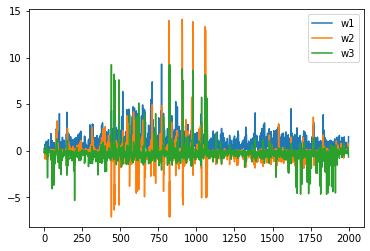

In [94]:
df_new.plot()
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_new['w1'], y=df_new['w2'], z=df_new['w3'],
                                   mode='markers',

    marker=dict(
        size=2,   # choose a colorscale
        color=df_color_final['color']
        ,opacity=0.8
    )))

fig.show()